## AI Project UCS415 
#### Finding Popularity of Spotify Songs
Predicting which songs will have a popularity score over 75 using KNN 

Nitansh Jain  102017025

In [484]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [485]:
spotify_df = pd.read_csv('spotify_data.csv')
spotify_df.head()

,title,artist,top genre,year,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,top year,artist_type,pop
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009,2022‑02‑17,140,81,61,-6,23,23,203,0,6,2010,Duo,70
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010,2022‑02‑17,138,89,68,-4,36,83,192,1,8,2010,Duo,68
2,I Need A Dollar,Aloe Blacc,pop soul,2010,2022‑02‑17,95,48,84,-7,9,96,243,20,3,2010,Solo,72
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010,2022‑02‑17,93,87,66,-4,4,38,180,11,12,2010,Solo,80
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010,2022‑02‑17,104,85,69,-6,9,74,268,39,5,2010,Solo,79


In [486]:
# checking if any null values are present
print(spotify_df.isnull().sum())

title          0
artist         0
top genre      0
year           0
added          0
bpm            0
nrgy           0
dnce           0
dB             0
live           0
val            0
dur            0
acous          0
spch           0
top year       0
artist_type    0
pop            0
dtype: int64


In [487]:
spotify_df.dtypes

title          object
artist         object
top genre      object
year            int64
added          object
bpm             int64
nrgy            int64
dnce            int64
dB              int64
live            int64
val             int64
dur             int64
acous           int64
spch            int64
top year        int64
artist_type    object
pop             int64
dtype: object

In [488]:
# converting artist type column values to a number [0,1,2]
print(spotify_df['artist_type'].value_counts())
spotify_df['artist_type'] = spotify_df['artist_type'].astype('category').cat.codes
print(spotify_df['artist_type'].value_counts())

Solo          748
Band/Group    169
Duo            70
Trio           13
Name: artist_type, dtype: int64
2    748
0    169
1     70
3     13
Name: artist_type, dtype: int64


In [489]:
# converting name of column top genre to genre
spotify_df = spotify_df.rename(columns={'top genre': 'genre', 'pop': 'popularity'})
spotify_df.head()

,title,artist,genre,year,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,top year,artist_type,popularity
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009,2022‑02‑17,140,81,61,-6,23,23,203,0,6,2010,1,70
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010,2022‑02‑17,138,89,68,-4,36,83,192,1,8,2010,1,68
2,I Need A Dollar,Aloe Blacc,pop soul,2010,2022‑02‑17,95,48,84,-7,9,96,243,20,3,2010,2,72
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010,2022‑02‑17,93,87,66,-4,4,38,180,11,12,2010,2,80
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010,2022‑02‑17,104,85,69,-6,9,74,268,39,5,2010,2,79


In [490]:
# getting columns from spotify_df from bpm to artist_type via loc
spotify_features = spotify_df

# dropping column added and top year from dataframe
spotify_features.drop(['title', 'artist', 'genre', 'added', 'year', 'top year', 'artist_type'], axis=1, inplace=True)
spotify_df.head()


,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity
0,140,81,61,-6,23,23,203,0,6,70
1,138,89,68,-4,36,83,192,1,8,68
2,95,48,84,-7,9,96,243,20,3,72
3,93,87,66,-4,4,38,180,11,12,80
4,104,85,69,-6,9,74,268,39,5,79


In [491]:
# checking correlation table
spotify_features.head()
spotify_features.corr(method='pearson')

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity
bpm,1.000000,0.118557,-0.111660,0.089568,0.014672,0.021128,-0.016536,-0.124614,0.149368,-0.025058
nrgy,0.118557,1.000000,-0.129279,0.713428,0.184094,0.372866,-0.049662,-0.504083,-0.099790,-0.234011
dnce,-0.111660,-0.129279,1.000000,-0.040538,-0.113324,0.264781,-0.168483,-0.075999,0.161734,0.093176
dB,0.089568,0.713428,-0.040538,1.000000,0.128134,0.317128,-0.082541,-0.392393,-0.165838,-0.145403
live,0.014672,0.184094,-0.113324,0.128134,1.000000,0.028092,-0.003094,-0.116081,0.043516,-0.137305
val,0.021128,0.372866,0.264781,0.317128,0.028092,1.000000,-0.185863,-0.164048,0.013192,-0.003752
dur,-0.016536,-0.049662,-0.168483,-0.082541,-0.003094,-0.185863,1.000000,0.026474,-0.035451,0.009219
acous,-0.124614,-0.504083,-0.075999,-0.392393,-0.116081,-0.164048,0.026474,1.000000,-0.010204,0.128195
spch,0.149368,-0.099790,0.161734,-0.165838,0.043516,0.013192,-0.035451,-0.010204,1.000000,0.061441
popularity,-0.025058,-0.234011,0.093176,-0.145403,-0.137305,-0.003752,0.009219,0.128195,0.061441,1.000000


In [492]:
# splitting spotify_features into dependent and independent variables
spotify_features_x = spotify_features.drop(['popularity'], axis=1)
spotify_features_y = spotify_features['popularity']

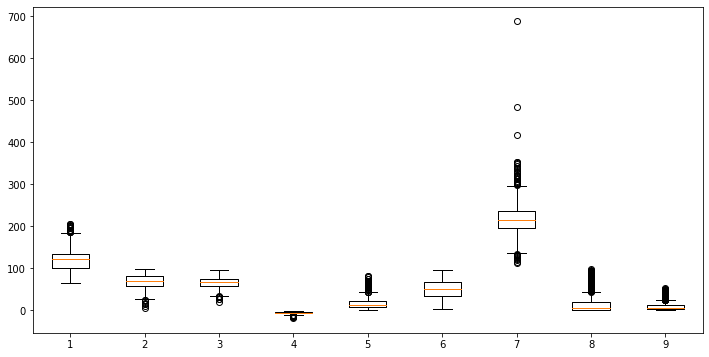

In [493]:
# Visulaizing the data before normalization
fig = plt.figure(figsize=(12,6))
plt.boxplot(spotify_features_x)
plt.show()

In [494]:
# normalizing spotify_features using min_max scaler
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
spotify_features_scaled_x = scaler.fit_transform(spotify_features_x)
spotify_features_scaled_x[0:2]

array([[ 0.71451179,  0.72072266, -0.44802436, -0.1664846 ,  0.37907473,
        -1.29455291, -0.43615634, -0.7389826 , -0.43830399],
       [ 0.63824839,  1.22218215,  0.08570105,  0.82155459,  1.34743228,
         1.48933206, -0.71179232, -0.68755365, -0.22260321]])

10


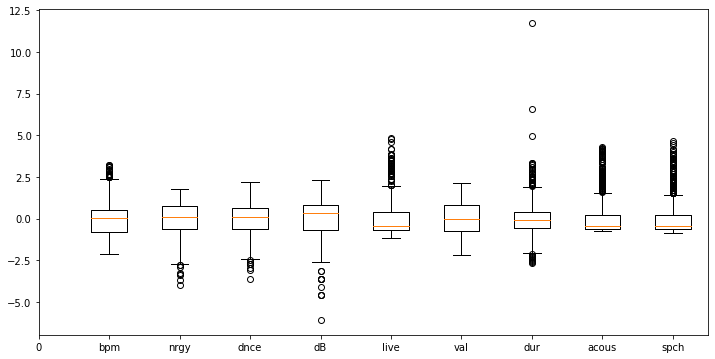

In [495]:
# after normalization of data using min_max scaler
xticks_values = [0, 'bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch']
print(len(xticks_values))
fig = plt.figure(figsize=(12,6))
plt.boxplot(spotify_features_scaled_x)
plt.xticks(range(0,len(xticks_values)), xticks_values)
plt.show()


In [496]:
spotify_features_x_np = spotify_features_scaled_x[:,:]
print(spotify_features_x_np[0:2])

[[ 0.71451179  0.72072266 -0.44802436 -0.1664846   0.37907473 -1.29455291
  -0.43615634 -0.7389826  -0.43830399]
 [ 0.63824839  1.22218215  0.08570105  0.82155459  1.34743228  1.48933206
  -0.71179232 -0.68755365 -0.22260321]]


In [497]:
spotify_features_y = np.where(spotify_features_y >= 75, 1, 0)
spotify_features_y[0:5]

array([0, 0, 0, 1, 1])

In [498]:
spotify_features_scaled_y = scaler.fit_transform(spotify_features_y.reshape(-1,1))
spotify_features_scaled_y[0:2]

spotify_features_y_np = spotify_features_y
spotify_features_y_np[0:5]

array([0, 0, 0, 1, 1])

In [499]:
print(spotify_features_x_np[0:2])
print(spotify_features_y_np[0:2])


[[ 0.71451179  0.72072266 -0.44802436 -0.1664846   0.37907473 -1.29455291
  -0.43615634 -0.7389826  -0.43830399]
 [ 0.63824839  1.22218215  0.08570105  0.82155459  1.34743228  1.48933206
  -0.71179232 -0.68755365 -0.22260321]]
[0 0]


In [500]:
from sklearn.model_selection import train_test_split
x_train_knn, x_test_knn, y_train_knn, y_test_knn = train_test_split(spotify_features_x_np, spotify_features_y_np, test_size=0.45, random_state=42)


In [501]:
from sklearn.neighbors import KNeighborsClassifier
n = KNeighborsClassifier(n_neighbors=19).fit(x_train_knn, y_train_knn)
n

KNeighborsClassifier(n_neighbors=19)

In [502]:
yhat_pred_knn = n.predict(x_test_knn)
print(yhat_pred_knn[0:10])
print(y_test_knn.size)

[1 1 1 1 1 1 0 1 1 0]
450


In [503]:
from sklearn import metrics
metrics.accuracy_score(y_test_knn, yhat_pred_knn)

0.6

In [504]:
ks = 30
mean_acc = np.zeros((ks-1))
std_acc = np.zeros((ks-1))

for n in range(1, ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train_knn,y_train_knn)
    yhat = neigh.predict(x_test_knn)
    mean_acc[n-1] = metrics.accuracy_score(y_test_knn,yhat)
    std_acc[n-1] = np.std(yhat==y_test_knn)/np.sqrt(yhat.shape[0])
print(mean_acc)
print(np.where(mean_acc == np.max(mean_acc)))

[0.53333333 0.50444444 0.54222222 0.58888889 0.58444444 0.56
 0.56888889 0.55777778 0.54888889 0.54       0.56888889 0.56222222
 0.56666667 0.58444444 0.57333333 0.58888889 0.58       0.58444444
 0.6        0.58444444 0.58888889 0.59777778 0.58222222 0.58444444
 0.58444444 0.58888889 0.57777778 0.56888889 0.57555556]
(array([18]),)


In [505]:
cm_knn = confusion_matrix(y_test_knn, yhat_pred_knn)
print(cm_knn)

[[ 75 121]
 [ 59 195]]


In [506]:
print('Classification Report: \n', metrics.classification_report(y_test_knn, yhat_pred_knn))

Classification Report: 
               precision    recall  f1-score   support

           0       0.56      0.38      0.45       196
           1       0.62      0.77      0.68       254

    accuracy                           0.60       450
   macro avg       0.59      0.58      0.57       450
weighted avg       0.59      0.60      0.58       450



In [507]:
error_rate = []
for i in range(1,40):
    Obj = KNeighborsClassifier(n_neighbors = i)
    Obj.fit(x_train_knn,y_train_knn)
    pred_i = Obj.predict(x_test_knn)
    error_rate.append(np.mean(pred_i != y_test_knn))


Text(0, 0.5, 'Error Rate')

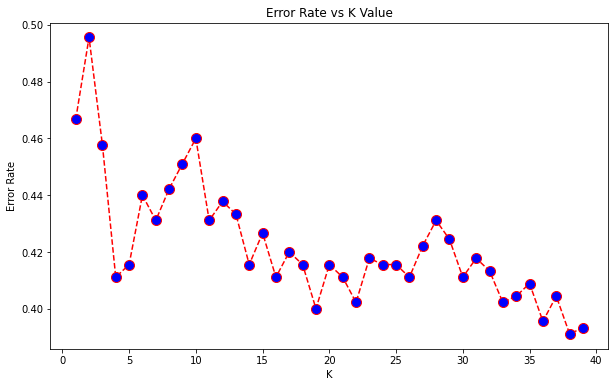

In [508]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [509]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=7)
scores = cross_val_score(knn, spotify_features_x_np, spotify_features_y_np, cv=10)
scores

array([0.63, 0.55, 0.48, 0.55, 0.54, 0.6 , 0.62, 0.62, 0.59, 0.61])

In [510]:
print('%.2f accuracy with a standard deviation of %.2f' % (np.mean(scores), np.std(scores)))

0.58 accuracy with a standard deviation of 0.05


In [511]:
from sklearn.model_selection import cross_val_predict
yhat_pred_knn_cross_val = cross_val_predict(knn, spotify_features_x_np, spotify_features_y_np, cv=10)

In [512]:
metrics.accuracy_score(spotify_features_y, yhat_pred_knn_cross_val)

0.579

In [513]:
cm_cross_val_score = confusion_matrix(spotify_features_y, yhat_pred_knn_cross_val)
print(cm_cross_val_score)

[[176 255]
 [166 403]]


In [514]:
print('Classification Report: \n', metrics.classification_report(spotify_features_y, yhat_pred_knn_cross_val))

Classification Report: 
               precision    recall  f1-score   support

           0       0.51      0.41      0.46       431
           1       0.61      0.71      0.66       569

    accuracy                           0.58      1000
   macro avg       0.56      0.56      0.56      1000
weighted avg       0.57      0.58      0.57      1000

